# Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('/Users/anthonymoubarak/Desktop/Ken Jee Project /cleaned_glassdoor_data.csv')
df = df.rename(columns = {'Average Salary (K $)':'Average_salary' , 'Company Age (Years)':'Age'})
df.head()

,Unnamed: 0,Unnamed: 0.1,Job Title,Average_salary,Job Description,Rating,Company Name,Location,Headquarters,Size,...,Same Location,Age,Python,Spark,Excel,Job Simplified,Position Level,Job_description_length,Job Description Length,Number of competitors
0,0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,NM,CA,501 to 1000 employees,...,0,48,1,0,1,Data Scientist,na,2536,2536,0
1,1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,MD,MD,10000+ employees,...,1,37,1,0,0,Data Scientist,na,4783,4783,0
2,2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,FL,FL,501 to 1000 employees,...,1,11,1,1,1,Data Scientist,na,3461,3461,0
3,3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,WA,WA,1001 to 5000 employees,...,1,56,1,0,0,Data Scientist,na,3883,3883,3
4,4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,NY,NY,51 to 200 employees,...,1,23,1,0,1,Data Scientist,na,2728,2728,3


# Basic distributions of some features

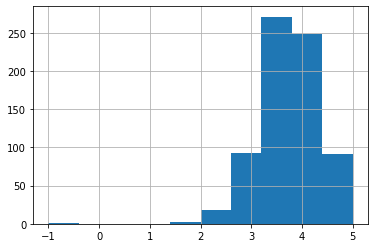

In [3]:
df.Rating.hist()

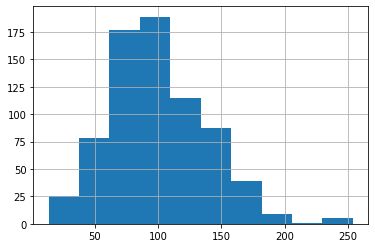

In [4]:
df.Average_salary.hist()

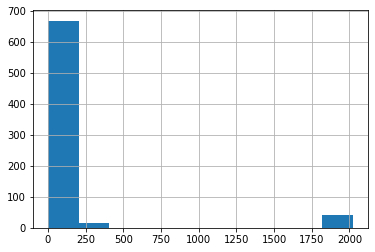

In [5]:
df.Age.hist()

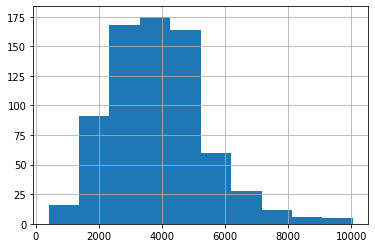

In [6]:
df['Job Description Length'].hist()

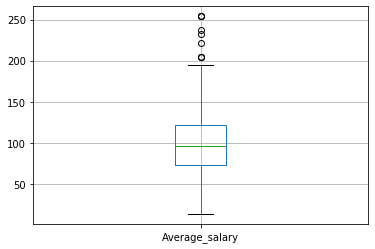

In [7]:
df.boxplot(column = ['Average_salary'])

# Correlation analysis on our continuous varibales

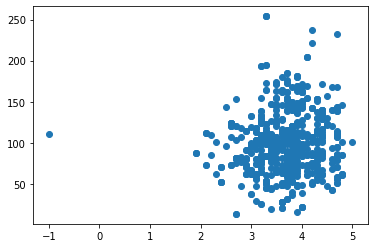

In [8]:
x1 = df['Rating']
y = df['Average_salary']

plt.scatter(x1 , y)

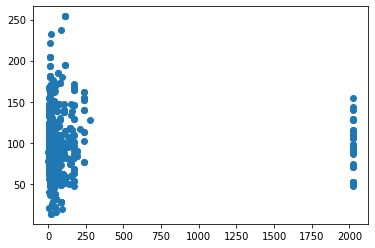

In [9]:
x2 = df['Age']

plt.scatter(x2 , y)

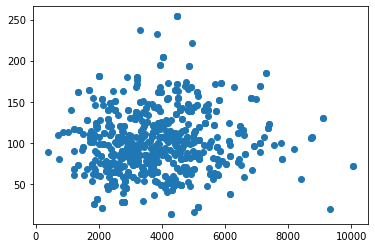

In [10]:
x3 = df['Job_description_length']

plt.scatter(x3 , y)

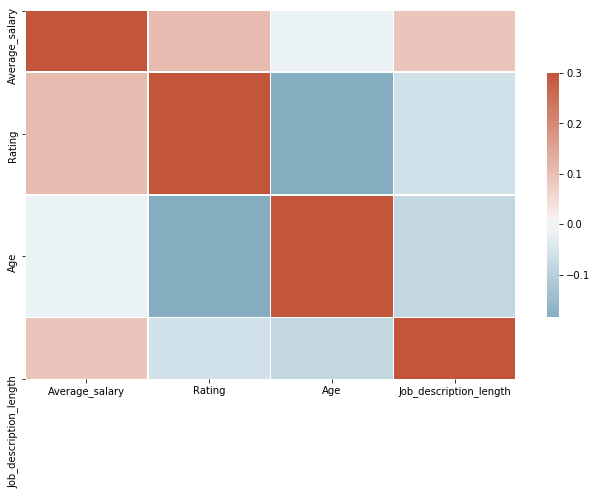

In [11]:
#sns correlation heatmap 

# Compute the correlation matrix
corr = df[['Average_salary' , 'Rating' , 'Age' , 'Job_description_length']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [12]:
#Notes from plot:

# Average Salary and Job discribtion, as well as rating and rating and average salary have the highest correlation
# However, the correlation is still low

# Categorical variable plotting

In [13]:
df_cat = df[['Location' ,'Size', 'Founded', 'Type of ownership',
            'Industry', 'Sector', 'Revenue',
            'Competitors', 'Same Location', 'Age', 'Python',
            'Spark', 'Excel','Job Simplified', 'Position Level']]

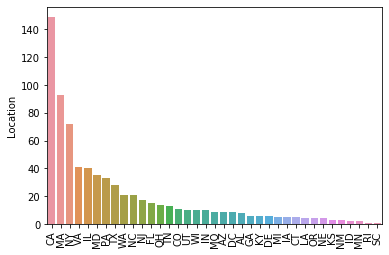

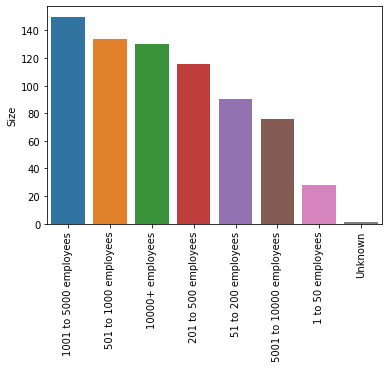

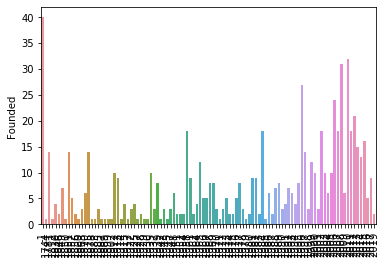

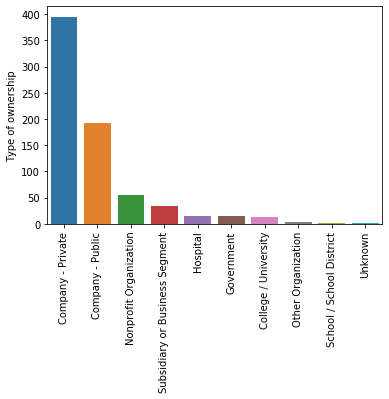

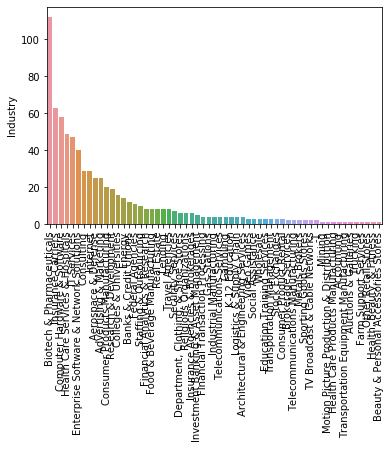

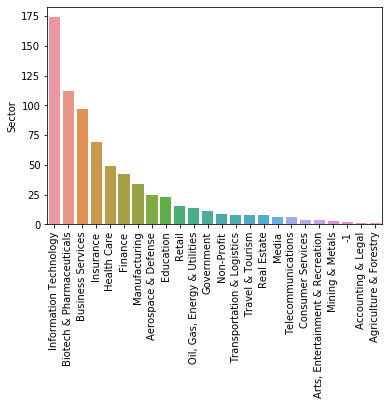

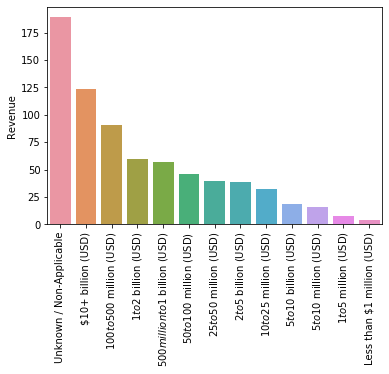

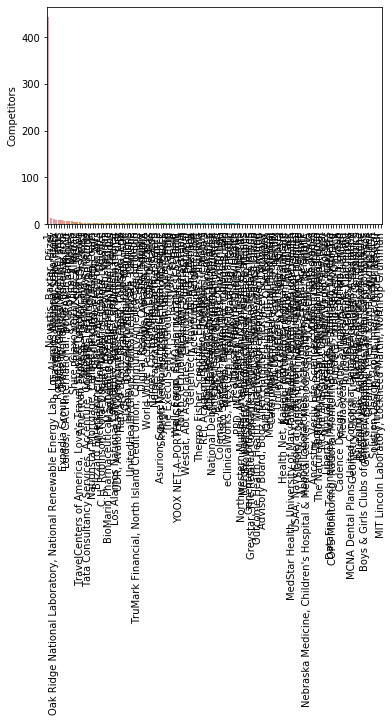

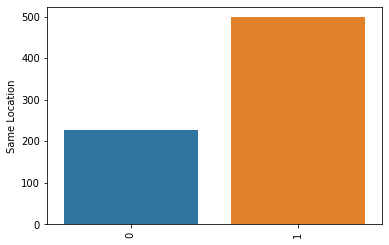

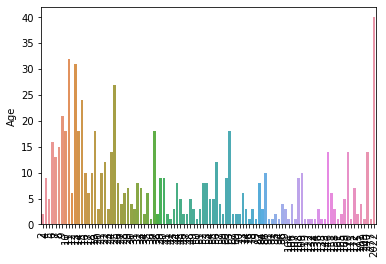

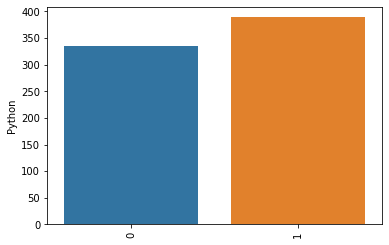

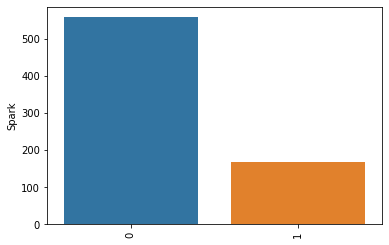

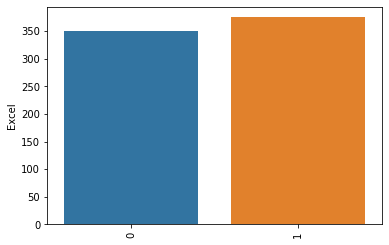

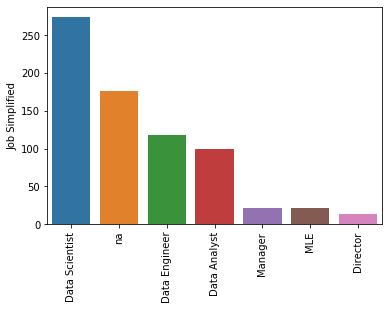

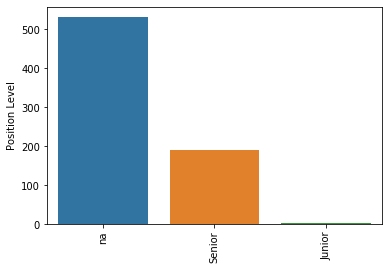

In [14]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x = cat_num.index, y = cat_num , data= df_cat)
    chart.set_xticklabels(chart.get_xticklabels() , rotation = 90)
    plt.show()

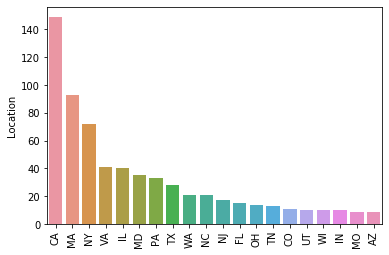

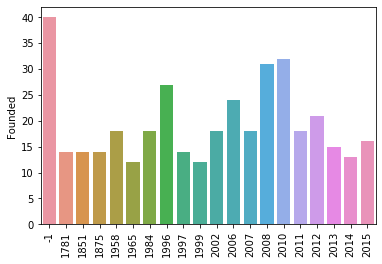

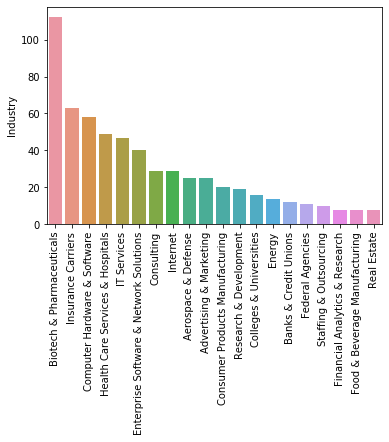

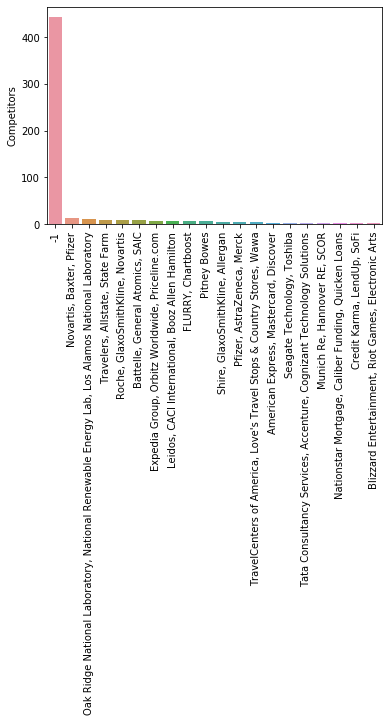

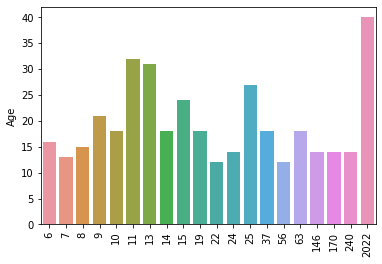

In [15]:
# A more careful look at the long ones (Top 20)

df_cat = df[['Location' , 'Founded',
            'Industry','Competitors', 'Age']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()[:20]
    chart = sns.barplot(x = cat_num.index, y = cat_num , data= df_cat)
    chart.set_xticklabels(chart.get_xticklabels() , rotation = 90)
    plt.show()

# Salary vs Categorical Variables (Pivot Tables)

In [16]:
# Average Salary per Industry 
pd.pivot_table(df , index=['Industry'] , values = ['Average_salary']).sort_values(by = ['Average_salary'] , ascending = False)

,Average_salary
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


In [17]:
# Average Salary per job type and position level 
pd.pivot_table(df , index=['Job Simplified' , 'Position Level'] , values = ['Average_salary'])

Average_salary
Job Simplified Position Level                
Data Analyst   Junior               53.250000
               Senior               75.480769
               na                   60.964789
Data Engineer  Senior              123.638889
               na                   97.067073
Data Scientist Junior              106.500000
               Senior              134.580247
               na                  108.869792
Director       na                  168.607143
MLE            Senior              127.000000
               na                  126.218750
Manager        na                   84.022727
na             Senior              111.268293
               na                   76.696296

In [18]:
#Average salary per location 

pd.pivot_table(df , index=['Location'] , values = ['Average_salary']).sort_values(by = ['Average_salary'] , ascending = False)

,Average_salary
Location,
CA,122.392617
IL,116.662500
MA,107.715054
NJ,104.558824
DC,100.222222
RI,100.000000
NY,98.652778
NC,98.452381
MD,97.357143


In [19]:
#Displaying several rows (more than 10) of a pandas dataframe
pd.set_option('display.max_rows' , None)

In [20]:
#Average salary per job type per location 
pd.pivot_table(df , index=['Location' , 'Job Simplified'] , values = ['Average_salary']).sort_values(by = ['Location'])

Average_salary
Location Job Simplified                
AL       Data Analyst         60.750000
         Data Engineer        65.000000
         na                   51.833333
AZ       Data Analyst         55.000000
         Data Engineer        79.500000
         Data Scientist       69.500000
         na                  124.500000
CA       Manager              80.611111
         MLE                 177.300000
         na                  100.384615
         Data Engineer       129.540000
         Data Analyst         85.250000
         Data Scientist      140.022727
CO       Data Analyst         29.500000
         Data Engineer        99.000000
         Data Scientist      108.666667
         MLE                 100.500000
         na                   31.500000
CT       Data Scientist       84.000000
         na                   62.500000
DC       Data Analyst         63.500000
         Data Engineer        85.000000
         Data Scientist      145.000000
DE       na                   27.500000
FL       Data Engineer        71.500000
         Data Scientist       97.357143
         Data Analyst         47.500000
GA       Data Scientist       81.333333
         na                   80.000000
IA       Data Analyst         43.000000
         Data Engineer       102.833333
ID       Data Analyst         56.250000
IL       na                   57.166667
         Data Analyst         66.500000
         Data Engineer        96.125000
         Data Scientist      117.233333
         Director            221.750000
         MLE                 133.000000
IN       na                   69.000000
         Data Scientist       84.500000
         Data Engineer       114.500000
KS       MLE                  87.000000
KY       Data Scientist       84.000000
         na                  103.500000
LA       Data Analyst         48.000000
         Data Engineer        70.500000
         na                   20.000000
MA       Manager              71.900000
         Director            117.833333
         na                  111.513889
         Data Engineer       107.291667
         Data Analyst         59.125000
         Data Scientist      113.750000
MD       Data Scientist      109.115385
         na                   88.750000
         Data Analyst         80.666667
         Data Engineer       109.000000
MI       Data Scientist       98.833333
         Manager              87.500000
MN       Data Analyst         76.000000
         Data Engineer        95.000000
MO       Data Analyst         61.000000
         Data Scientist      127.666667
         Manager              40.500000
         na                   72.333333
NC       Data Engineer       104.250000
         Data Scientist      117.000000
         na                   90.916667
NE       na                   41.000000
NJ       na                  127.750000
         Manager             109.500000
         Director            161.500000
         Data Engineer       112.000000
         Data Scientist      106.875000
         Data Analyst         65.700000
NM       Data Scientist       74.333333
NY       Data Analyst         65.607143
         Data Engineer        86.375000
         Data Scientist      115.250000
         MLE                 125.000000
         na                   81.583333
OH       na                   88.125000
         Data Analyst         45.500000
         Data Scientist      105.285714
OR       Data Scientist       98.500000
         Data Engineer        73.000000
PA       Data Analyst         62.750000
         Data Engineer        91.500000
         Data Scientist      113.333333
         MLE                 120.500000
         Manager             109.666667
         na                   76.062500
RI       Data Analyst        100.000000
SC       na                   60.500000
TN       Data Analyst         13.500000
         Data Engineer       100.950000
         Data Scientist       96.000000
TX       Data Scientist      100.730769
         na              

In [21]:
# Average salary per remaining variables 

remaining_variables = ['Rating' , 'Headquarters','Size', 'Revenue',
                       'Type of ownership' , 'Python', 'Spark', 'Excel']

for i in remaining_variables:
    print(pd.pivot_table(data = df , index = i , values = ['Average_salary']).sort_values(by = ['Average_salary'] , ascending = False))



        Average_salary
Rating                
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
-1.0        110.500000
 2.6        109.083333
 4.4        108.606061
 3.3        108.138889
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 5.0        101.000000
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
                 Average_salary
Headquarters                   
 Bermuda             147.000000
 AR                  139.000000
 SC                  134.000000
 Japan               132.285714
 France              125.000000
 CA              

# Notes from EDA

### 1)  No obvious correlations between any 2 continuous varibales. However, there is a slight correlation between average salary and company rating, as well as average salary and job decription length.

### 2) Most job offers are in CA,MA,NY,IL, and are for big/large companies (ranging from 200 to 10,000+ employees)

### 3) Majority of offers are from private and public companies (rather than nonprofit, hospitals, governments)

### 4) Highest average salaries come from retail stores, motion picture and distribution, financial firms, and healthy/fitness firms

### Overall, the analysis is being conducted on a variety of large scale companies from many industries, increasing the overall credibility of the results we will obtain in the model building phase of the project 

In [23]:
#Resave the final df version as a new csv file 
df.to_csv('cleaned_glassdoor_data_2.csv')